# Introduction to Null Hypothesis Significance Test

With [SciPy (Scientific Python)](https://www.scipy.org/)  we are able to make statistical analysis.

#### Learning objectives
 By the end of this notebook you will:
+ Run t-tests for independent groups and F-tests to test for equal variances
+ Learn how to obtain and interpret p-values
+ Interpret statistical results. 
---

Differences between the scipy stats functions


## **1. Theory**

What are the differences between a two-tailed and one-tailed tests? Give an example of a set of hypotheses for a two tailed test and indicate how they would change for a one-tailed test.

What is the sampling distribution? How do you calculate the standard deviation of the sampling distribution using population statistics?

How is the t-distribution different from the Normal distribution? Why do we need to use the t-distribution?

Describe three ways (and how they are different to each other) to determine the outcome of a null-hypothesis test.

For a two-sample t-test, with samples sizes $n_1$ and $n_2$, how many degrees of freedom do you have and why?

What is a p-value and how do you interpret it?

The following code generates values from a Normal distribution and plots them as a histogram

(array([ 4., 12., 19., 57., 72., 66., 44., 17.,  6.,  3.]),
 array([-4.87177756, -1.56270846,  1.74636065,  5.05542975,  8.36449885,
        11.67356795, 14.98263706, 18.29170616, 21.60077526, 24.90984436,
        28.21891346]),
 <BarContainer object of 10 artists>)

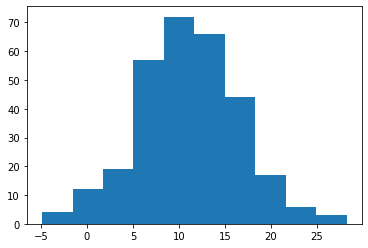

In [2]:
from matplotlib import pyplot as plt
from scipy.stats import norm

X = norm.rvs(loc=11.5, scale=5.5, size=300)
plt.hist(X)

* (a) Generate values from another Normal distribution and store them in a variable $Y$ and plot the histogram
* (b) Now plot the histogram of the combined distribution $Z = X + Y$. What do you notice about the mean and standard deviation of this combined distribution?

## **2. T-tests using Python**: 

Look up the functions for t-tests in the scipy.stats library https://docs.scipy.org/doc/scipy/reference/stats.html
What are the differences between the three functions `ttest_1samp`, `ttest_ind` and `ttest_rel` ?

Using Pandas, the dataset `BaGS data Period5 - Climate Change Laws of the World.xls` revised before, will be loaded and analysed. Here the linkto download it: [Data](https://drive.google.com/file/d/11QDjI4aGZxCMRv2TmztAgEhJg5zf5Ak8/view?usp=sharing). Remember to put the file in the same place where your notebook is.

In [4]:
# import the library
import pandas as pd

# directory to the file, it can be from own computer or from web
url = '../data/BaGS data Period5 - Climate Change Laws of the World.xls'

# read the url and save it as a variable called df, note we are using read_excel 
df = pd.read_excel(url)

Use `df.head()` to get the first rows of the dataframe

In [5]:
df.head(2)

,Title,Type,Country,Country_ISO,Region,SubRegion,Emergency_Framework,Document_Types,Document_Link,Document_Summary,...,Keyword_Biodiversity_Count,Keyword_Building_Count,Keyword_Coal_Count,Keyword_Deforestation_Count,Keyword_Education_Count,Keyword_Energy_Count,Keyword_Transport_Count,Keyword_Circular_Economy_Count,Keyword_Waste_Count,Keyword_Water_Count
0,Energy Sector Strategy 1387-1391 (2007/8-2012/3),executive,Afghanistan,AFG,Asia,Southern Asia,No Framework Specified,Strategy,Full text|https://climate-laws.org/rails/activ...,This strategy sets the vision and goals for th...,...,0,0,0,0,0,3,0,0,0,0
1,Rural Renewable Energy Policy (RREP),executive,Afghanistan,AFG,Asia,Southern Asia,Adaptation,Policy,Full text (PDF)|https://climate-laws.org/rails...,<div>This policy aims at creating better socia...,...,0,0,0,0,0,4,0,0,0,0


Use `df.describe()` to get summary statistics about the data

In [6]:
df.describe()

,Year_Document_Release,Year_Last_Amendment,Months_Between_Release_and_Last_Amendment,Months_Since_Release,Positive_Words,Negative_Words,Emergency_Sentiment_Rate,Summary_Words_Length,Keyword_Agriculture_Count,Keyword_Biodiversity_Count,Keyword_Building_Count,Keyword_Coal_Count,Keyword_Deforestation_Count,Keyword_Education_Count,Keyword_Energy_Count,Keyword_Transport_Count,Keyword_Circular_Economy_Count,Keyword_Waste_Count,Keyword_Water_Count
count,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,2010.483610,2010.483610,15.213777,122.440855,1.765321,1.780998,-0.049633,175.465083,0.170546,0.089311,0.620428,0.049406,0.031829,0.088361,3.354394,0.200000,0.004276,0.100713,0.232304
std,7.654731,7.654731,53.876371,91.661348,2.404652,2.793940,0.680802,165.286046,0.529444,0.394357,1.174370,0.339748,0.207817,0.432499,4.962005,0.670112,0.078488,0.411716,0.825394
min,1947.000000,1947.000000,0.000000,2.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.000000,2008.000000,0.000000,64.000000,0.000000,0.000000,-0.666700,77.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2012.000000,2012.000000,0.000000,105.000000,1.000000,1.000000,0.000000,134.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2015.000000,2015.000000,0.000000,153.000000,3.000000,2.000000,0.333300,218.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,2021.000000,2021.000000,475.000000,882.000000,24.000000,25.000000,1.000000,2946.000000,7.000000,6.000000,11.000000,6.000000,3.000000,10.000000,35.000000,10.000000,2.000000,7.000000,14.000000


There are quite some variables, we could nevertheless use SciPy to calculate more advanced statistics for a particular column

In [4]:
from scipy import stats

# save the column in object x
x = df['Months Since Release']

# function describe from scipy
stats.describe(x)

DescribeResult(nobs=2105, minmax=(0, 880), mean=120.74964370546319, variance=8396.84175961634, skewness=2.487461197664903, kurtosis=11.638515674583811)

Are these **population** or **sample** statistics? How could you check?

## **2. Difference in means test**
- Normally this test is used when two variables of the same nature are compared in different context
- For example: Variable height between male and female
- ...

$H_0: \mu_1 = \mu_2$  
$H_a: \mu_1 ≠ \mu_2$


The Paris agreement was adopted by consensus on 12 December 2015...

Let's explore if there is a difference on the number of climate change laws before and after by country


**IMPORTANT** The **Level of observation** is by **policy document**, while the **Level of Analysis** we wish to conduct is by **country** therefore we need to get the data in the right shape:

In [5]:
# Filtering the policy documents after 2015
df_after_2015 = df[df['Year Document Release'] >= 2015]

# Filtering the policy documents before 2015
df_before_2015 = df[(df['Year Document Release'] < 2015) & (df['Year Document Release'] >2010)]

In [6]:
# Advanced code with Pandas to get the number of policies before and after the Paris agreement
# The main take away is the resulting table
df_countries = df_before_2015\
    .groupby('Country')\
    .count()['Title']\
    .reset_index()\
    .merge(df_after_2015.groupby('Country').count()['Title'],
           on='Country', how='left')\
    .fillna(0)\
    .rename(columns={'Title_x':'Before_2015','Title_y':'After_2015'})

In [7]:
df_countries.head(5)

,Country,Before_2015,After_2015
0,Afghanistan,6,5.0
1,Albania,1,1.0
2,Algeria,5,0.0
3,Andorra,4,2.0
4,Angola,10,7.0


In [8]:
print('Climate Policies \n 5 years before Paris Agreement: {} (SD {}) \n 5 years  after Paris Agreement: {} (SD {})'.format(
    df_countries['Before_2015'].mean(), df_countries['Before_2015'].std(),
    df_countries['After_2015'].mean(), df_countries['After_2015'].std()))

Climate Policies 
 5 years before Paris Agreement: 3.526627218934911 (SD 2.5167654240101163) 
 5 years  after Paris Agreement: 3.562130177514793 (SD 3.8340560652557465)


In [9]:
import scipy.stats as stats

In [10]:
# two-sided test for the null hypothesis that two samples have equal average values.

stats.ttest_rel(df_countries['Before_2015'],df_countries['After_2015'])

Ttest_relResult(statistic=-0.12968760355073727, pvalue=0.8969687333440459)

In [11]:
#not significant p

## **3. Interpreting results**
- p-value is...
- ...


---
<i style="color:red">EXERCISES</i>

+ _1. 


___

+ _2. 


___